<a href="https://colab.research.google.com/github/Mohammed-khair/DiabeteProgression-Analysis-with-Linear-Regression/blob/main/DiabeteProgression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import r2_score

Load the data

In [31]:
dataset= datasets.load_diabetes()

Obtain the X, Y, and features from the data

In [32]:
X = dataset['data']
Y = dataset['target']
features = dataset['feature_names']

Show the features of the data

In [33]:
print(features)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Print the sizes of X, Y

In [34]:
print(X.shape)
print(Y.shape)

(442, 10)
(442,)


Print an example of the data

In [35]:
print(X[0])
print(Y[0])

[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
151.0


Now that the data is ready we will do the following:
* Iterate over all of the features
* fit the model over the all feature
* predict the output of the model on the testing set
* compare the predictions and targets to get the R2 score
* find out what feature has the largest r2_score

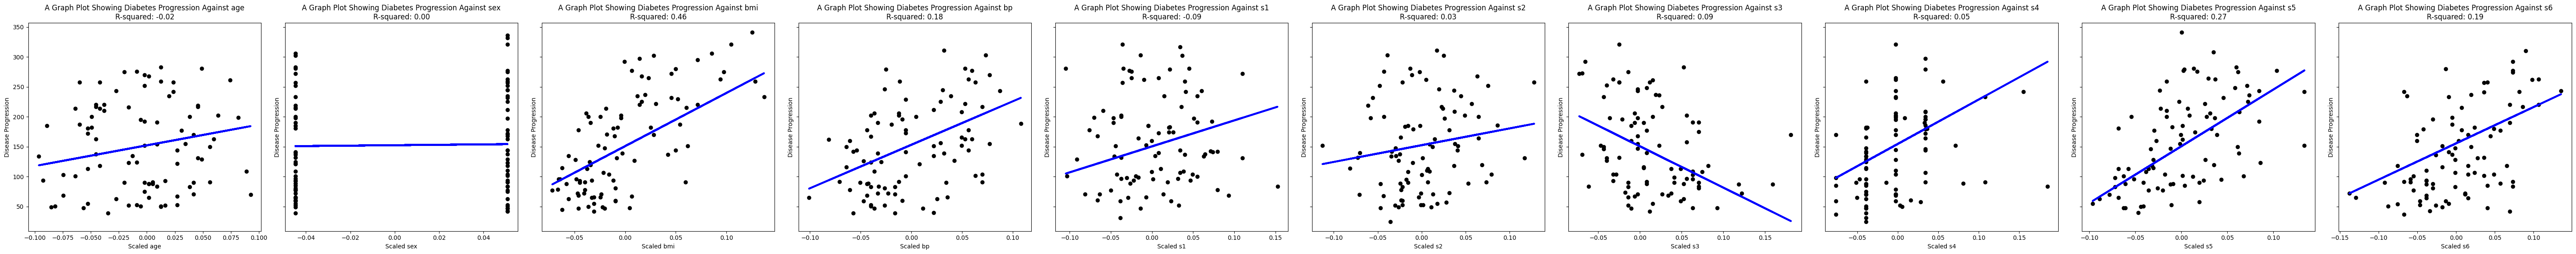

In [50]:
num_features = len(features)
fig, axs = plt.subplots(1, num_features, figsize=(num_features * 6, 6), sharey=True)


for index, feature in enumerate(features):
  # Make the training set have only one feature
  X_feature = X[:, index]

  # reshape the elements so that they can be plotted
  X_feature_reshaped = X_feature.reshape((-1, 1))

  # split the data into training ans test sets
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X_feature_reshaped, Y, test_size=0.2)

  # Fit the linear regression model
  model = linear_model.LinearRegression()
  model.fit(X_train, y_train)

  # find the predictions on the testing set
  y_pred = model.predict(X_test)

  # Calculate R-squared
  r_squared = r2_score(y_test, y_pred)

  # Plot the scatter plot and regression line in the respective subplot
  axs[index].scatter(X_test, y_test, color='black')
  axs[index].plot(X_test, y_pred, color='blue', linewidth=3)
  axs[index].set_xlabel(f"Scaled {feature}")
  axs[index].set_ylabel('Disease Progression')
  axs[index].set_title(f"A Graph Plot Showing Diabetes Progression Against {feature}\nR-squared: {r_squared:.2f}")

plt.tight_layout()
plt.show()

Out of all the features, the bmi has the highest R2 score and thus has a linear dependency with the target variable.
We are only interested with the highest r2 score